In [1]:
from deeptrace.utils import BrainStack, frame_to_rgb
# to show in git, set to qt or notebook for interactive
%matplotlib inline 
import numpy as np
import pylab as plt

# open the raw data
stack = BrainStack(channel_folders=['../../sampledata/210723_NAc326F_488_s3_0_8x_13-31-25/',
                   '../../sampledata/210723_NAc326F_640_s3_0_8x_11-50-51/'])
# show the dimmensions of the dataset
print('The stack has {0} slices {1} channels and {2} by {3} pixels.'.format(*stack.shape))

The stack has 1855 slices 2 channels and 2560 by 2160 pixels.


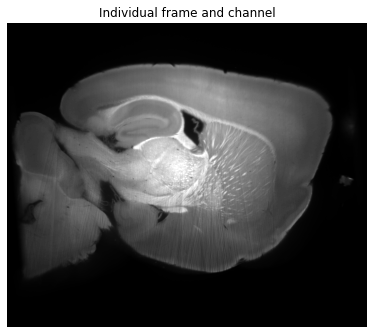

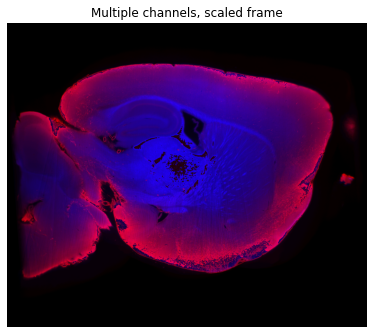

In [2]:
iframe = len(stack)//2 # choose a frame in the middle of the stack
# plot an image of the stack
# show one channel for a single frame
fig = plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
img = stack[iframe,0]
ax.imshow(img.T,clim = [np.percentile(img,20),np.percentile(img,99.9)],cmap='gray') # hightlight the scale a bit
ax.axis('off');
ax.set_title('Individual frame and channel')
# show the rgb image but adjust it a bit
fig = plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])

# get all channels and convert to RGB
img = frame_to_rgb(stack[iframe,:]) 

# Make the image brigther
scale = 8 
img = img*scale

# Roll the axis to get the colors straight 
img = np.roll(img,-1,axis=2)

# Alternativelly one can assign the colors by hand
# tmp[:,:,0] = img[:,:,1]; tmp[:,:,1] = img[:,:,0]
# img = tmp

# clip the edges and datatype
img = np.clip(0,255,img).astype('uint8')
ax.imshow(img.transpose([1,0,2]))
ax.axis('off');
ax.set_title('Multiple channels, scaled frame');